# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

Student name: Tajinder Sharma

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here
#delcare variables that will take the attributes of our shape dimensions respectively
rows, columns = df.shape
        
#print out the rows and columns 
print("There are",rows,"rows present in this data.")
print("There are",columns,"columns present in this data.")

There are 1898 rows present in this data.
There are 9 columns present in this data.


#### Observations:


There were nearly 2000 rows in our dataset and 9 attributes(columns).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame

#print(df.info())
#use df.dtypes to call for the different datatypes only exlcuding other info
print(df.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:


There are Three total different datatypes in this dataset.
4 of them are of type integer(int64)
4 of them are objects
1 of them is a floating point(float64)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [10]:
# Write your code here

#we can use isnull to get null values and use sum to add them up
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


There are no missing or null values in our dataset. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [14]:
# Write your code here
#here we can use some pandas
min_time = df['food_preparation_time'].min()
mean_time = round(df['food_preparation_time'].mean(),2) #round the decimal point only 2 digits
max_time = df['food_preparation_time'].max()

print("The max time it took to prepare the food was",max_time,"minutes")
print("The min time it took to prepare the food was",min_time,"minutes")
print("The average time it took to prepare the food was",mean_time,"minutes")



The max time it took to prepare the food was 35 minutes
The min time it took to prepare the food was 20 minutes
The average time it took to prepare the food was 27.37 minutes


#### Observations:


The average time to prepare the food seemed to be just over 27 minutes as the best time was 20 and the worst was 35. 

### **Question 5:** How many orders are not rated?

In [20]:
# Write the code here

#since the unrated orders have that "not given" tag, we will use that to find out
unrated_orders_count = df[df['rating'] == 'Not given'].shape[0]
percentage = unrated_orders_count/1898 #calclate the percentage of orders left unrated

print("There are",unrated_orders_count,"unrated orders")
print(round(percentage*100,2),"% are unrated")

There are 736 unrated orders
38.78 % are unrated


#### Observations:


We found out that nearly 40% of the data is unrated, so that might not be the most helpful way of getting feedback.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

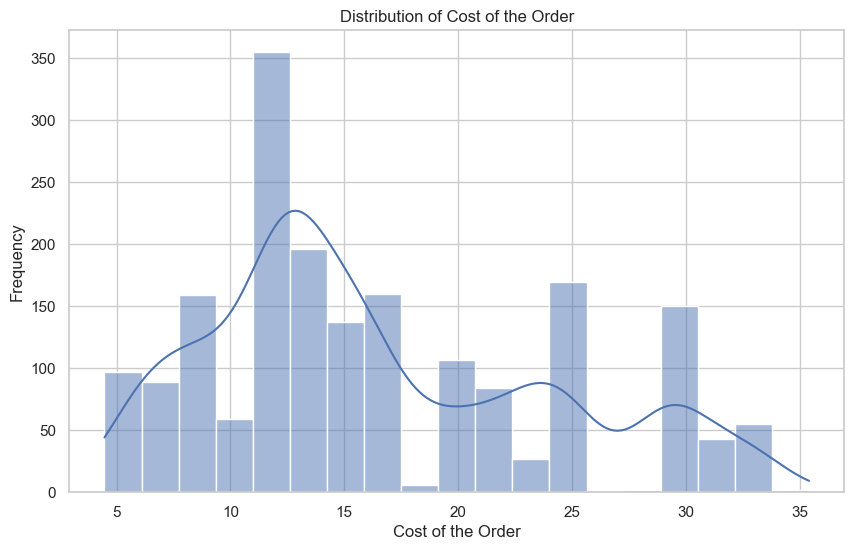

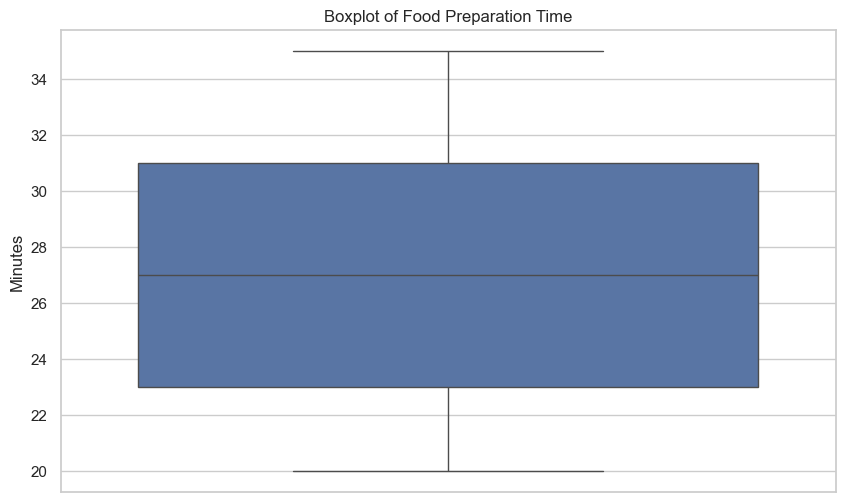

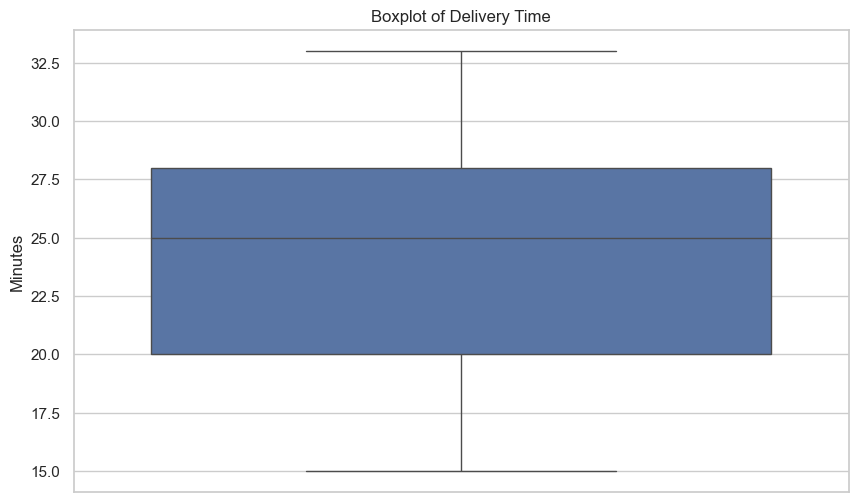

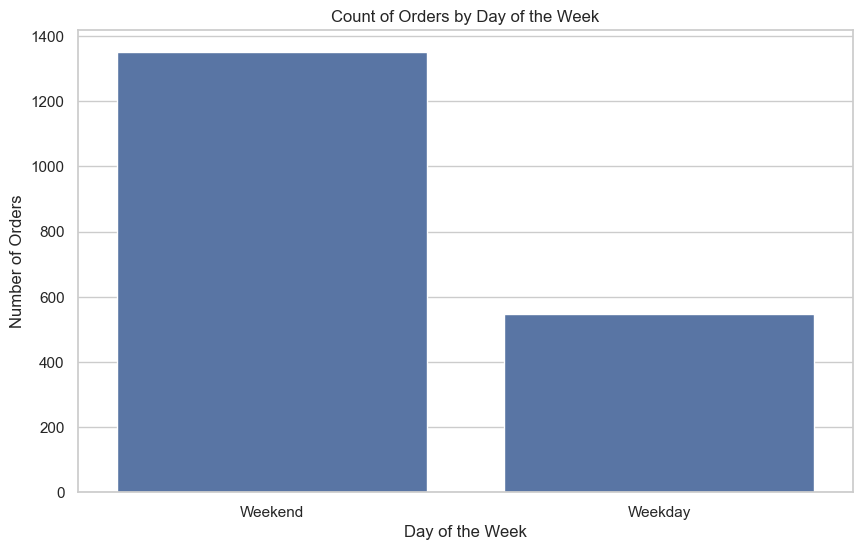

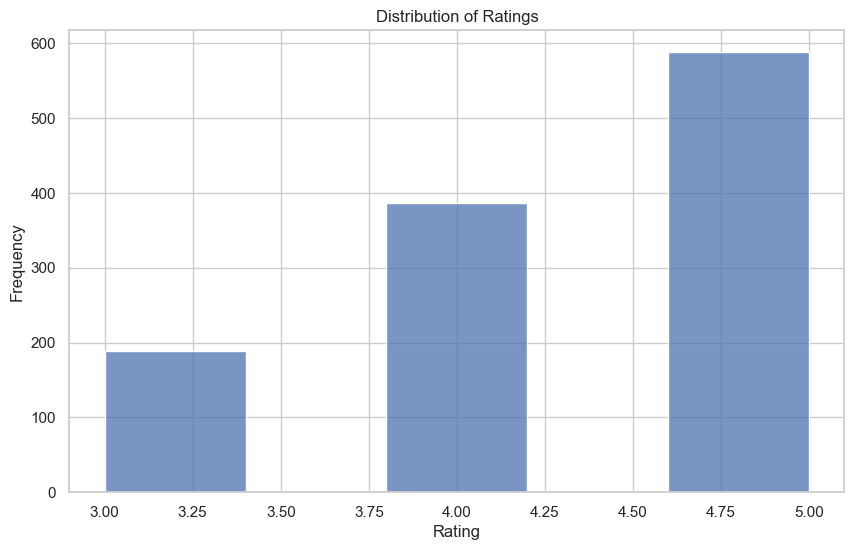

In [22]:
# Write the code here
# make rating a numerical value and deal with no rating cells
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'food_preparation_time'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Minutes')
plt.show()

# Boxplot of 'delivery_time'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.ylabel('Minutes')
plt.show()

# Count plot of 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# Histogram of 'rating' after removing no ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [23]:
# Write the code here

top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants in terms of the number of orders received:",top_5_restaurants)

Top 5 restaurants in terms of the number of orders received: restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [24]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine)

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [29]:
# Write the code here
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
print("Percentage of the orders costing more than 20 dollars:", round(percentage_above_20,2))

Percentage of the orders costing more than 20 dollars: 29.24


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [27]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is:", round(mean_delivery_time,2),"minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [30]:
# Write the code here
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

### Recommendations:

*  

---